In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data/german/german_credit_data.csv",index_col=0)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


<b>Age </b>(numeric)<br>
<b>Sex </b>(text: male, female)<br>
<b>Job </b>(numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> (text: own, rent, or free)<br>
<b>Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>Checking account </b>(numeric, in DM - Deutsch Mark)<br>
<b>Credit amount</b> (numeric, in DM)<br>
<b>Duration</b> (numeric, in month)<br>
<b>Purpose</b>(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk </b> (Value target - Good or Bad Risk)<br>

# Análise exploratória de dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


Somente "Saving accounts" e "Checking account" Possuem valores nulos. Para não remover estas colunas nem as linhas com os valores nulos, vamos substituir os valores nulos por "no_info":

In [4]:
df = df.fillna("no_info")

In [5]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       5
Checking account      4
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

Aqui damos uma olhada nos possíveis valores das colunas:

In [6]:
for col in df:
    if(df[col].unique().shape[0] <= 10):
        print(col)
        print(df[col].unique())
        print()

Sex
['male' 'female']

Job
[2 1 3 0]

Housing
['own' 'free' 'rent']

Saving accounts
['no_info' 'little' 'quite rich' 'rich' 'moderate']

Checking account
['little' 'moderate' 'no_info' 'rich']

Purpose
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']

Risk
['good' 'bad']



Conferimos se há linhas duplicadas:

In [7]:
df.duplicated().sum()

0

## Análise univariada

Verificando outliers para variáveis numéricas:

In [8]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


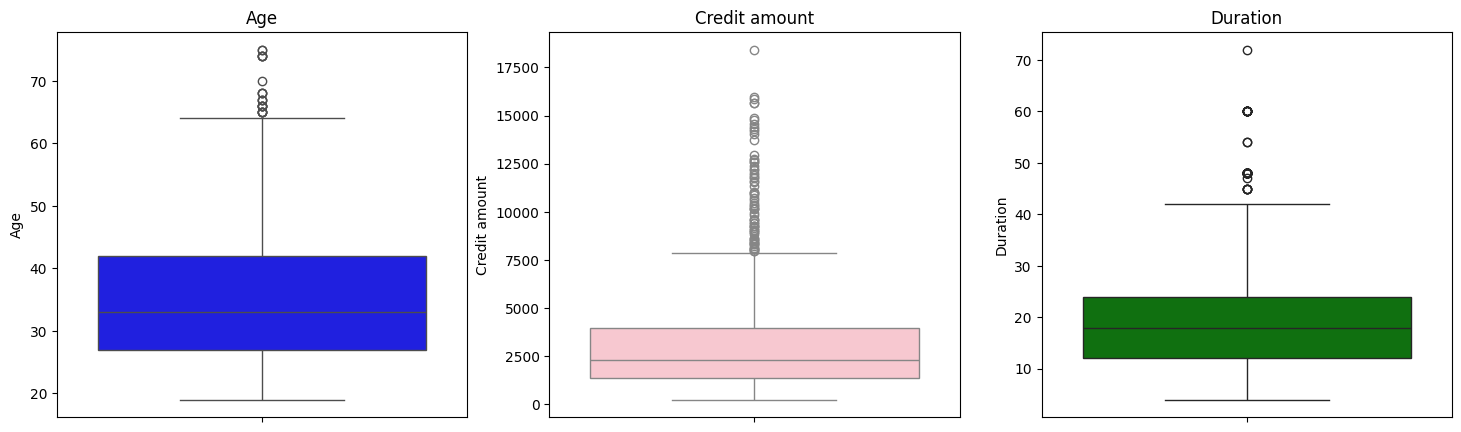

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(df['Age'], ax=axes[0], color='blue')
axes[0].set_title('Age')
sns.boxplot(df['Credit amount'], ax=axes[1], color='pink')
axes[1].set_title('Credit amount')
sns.boxplot(df['Duration'], ax=axes[2], color='green')
axes[2].set_title('Duration')

for subplot in axes:
    subplot.set_xticklabels([])
    
plt.show()

Parece que não haver necessidade de preocuparmos com outliers.

<Axes: xlabel='Risk', ylabel='count'>

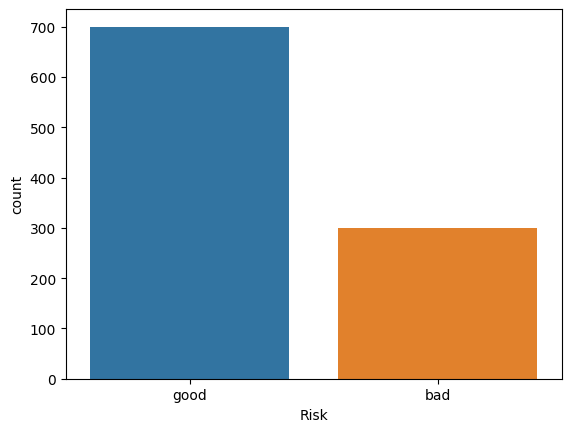

In [10]:
sns.countplot(df, x="Risk", hue="Risk")

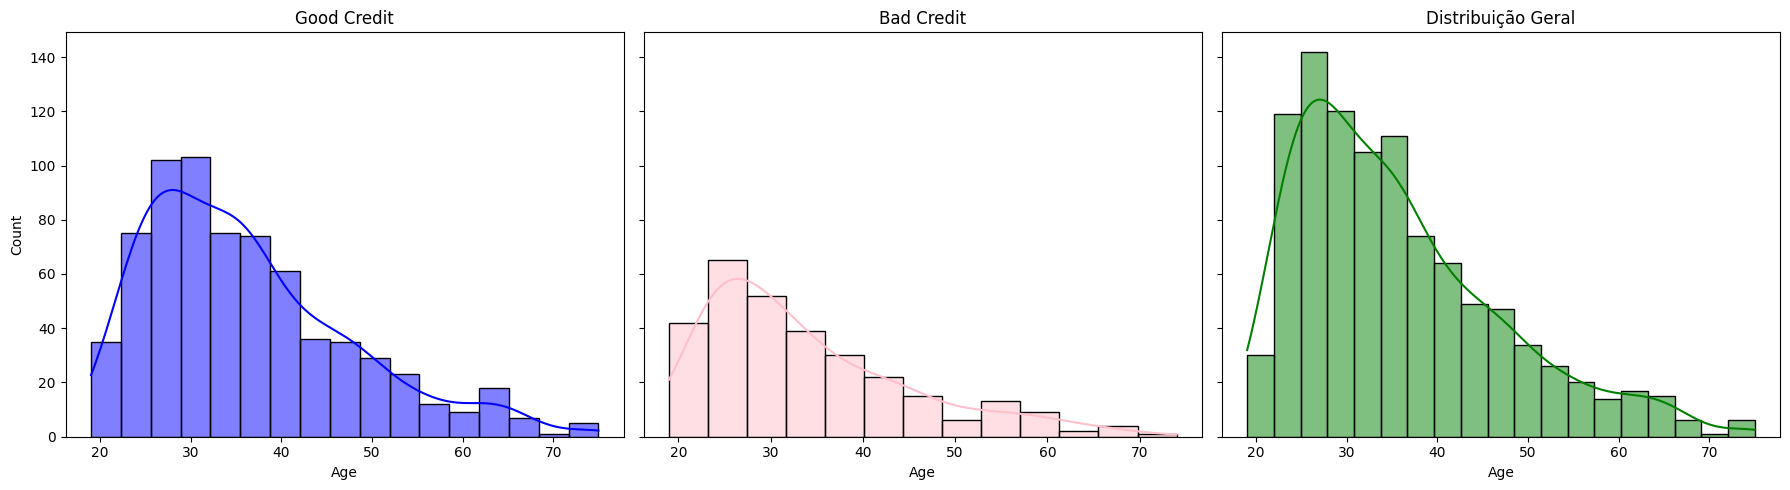

In [11]:
df_good = df.loc[df["Risk"] == 'good']
df_bad = df.loc[df["Risk"] == 'bad']

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.histplot(df_good['Age'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Good Credit')

sns.histplot(df_bad['Age'], kde=True, ax=axes[1], color='pink')
axes[1].set_title('Bad Credit')

sns.histplot(df['Age'], kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribuição Geral')

plt.tight_layout()
plt.show()

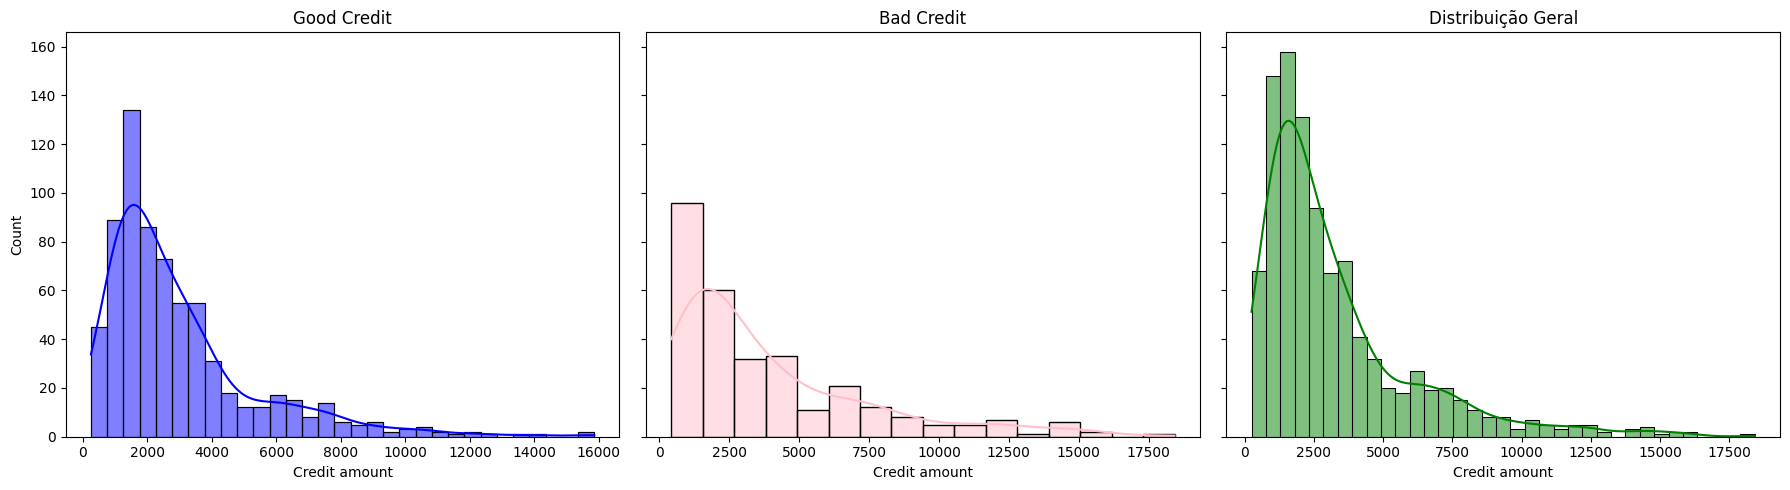

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.histplot(df_good['Credit amount'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Good Credit')

sns.histplot(df_bad['Credit amount'], kde=True, ax=axes[1], color='pink')
axes[1].set_title('Bad Credit')

sns.histplot(df['Credit amount'], kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribuição Geral')

plt.tight_layout()
plt.show()

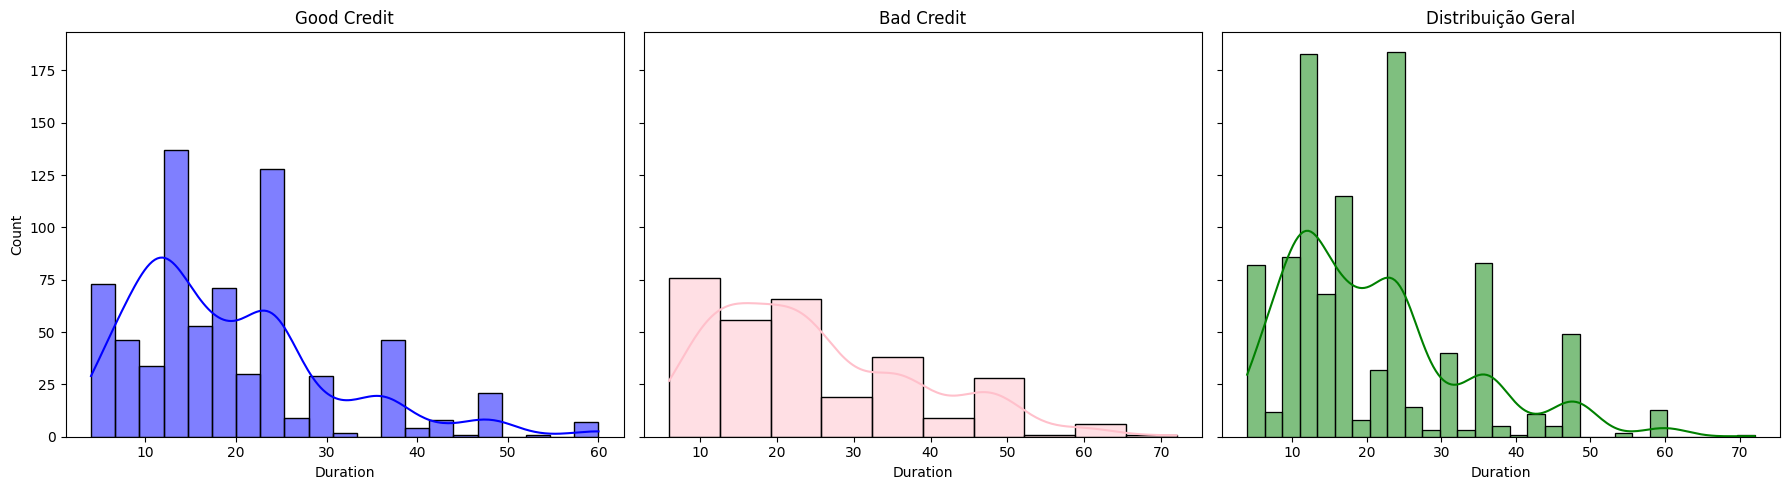

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.histplot(df_good['Duration'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Good Credit')

sns.histplot(df_bad['Duration'], kde=True, ax=axes[1], color='pink')
axes[1].set_title('Bad Credit')

sns.histplot(df['Duration'], kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribuição Geral')

plt.tight_layout()
plt.show()

## Análise bivariada

Colocando as idades em diferentes categorias:

In [14]:
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df["Age_cat"] = pd.cut(df.Age, interval, labels=cats)

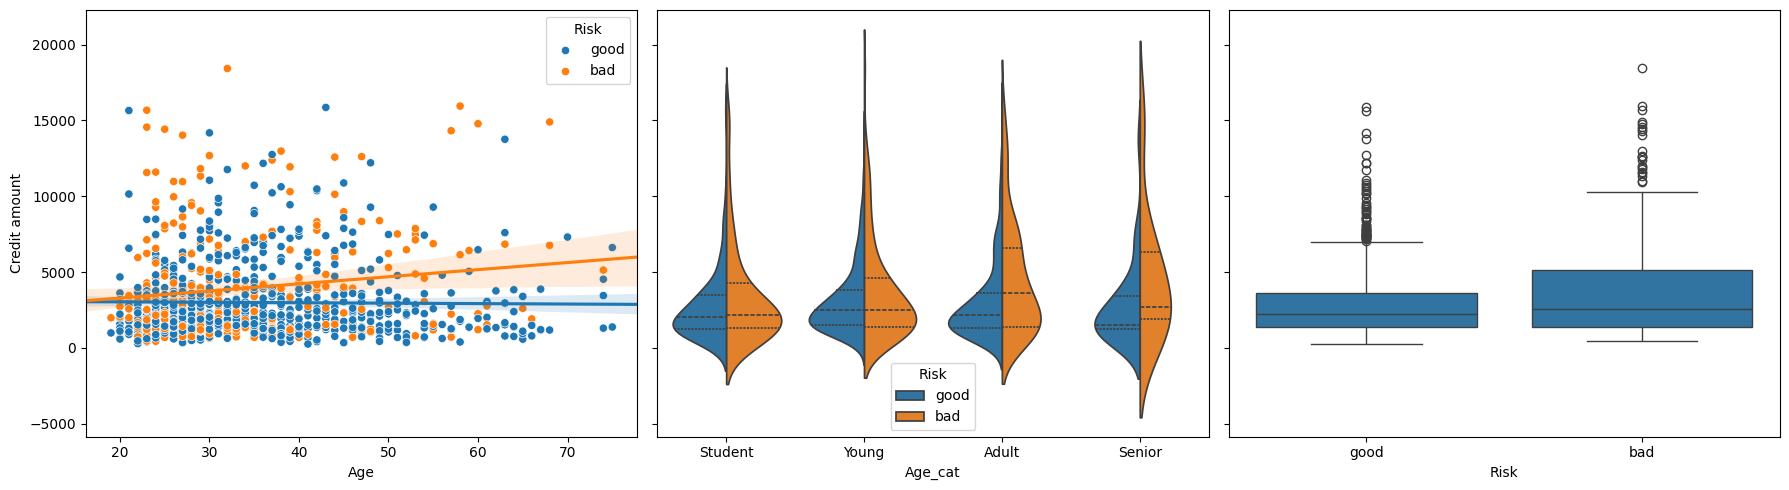

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.scatterplot(df, x='Age', y='Credit amount', hue='Risk', ax=axes[0])

for _,gr in df.groupby('Risk', sort=False):
    sns.regplot(x='Age', y='Credit amount', data=gr, scatter=False, ax=axes[0], truncate=False)
    
sns.violinplot(df, x='Age_cat', y='Credit amount', hue='Risk', split=True, inner="quart", ax=axes[1])
sns.boxplot(df, x='Risk', y='Credit amount', ax=axes[2])

plt.tight_layout()
plt.show()

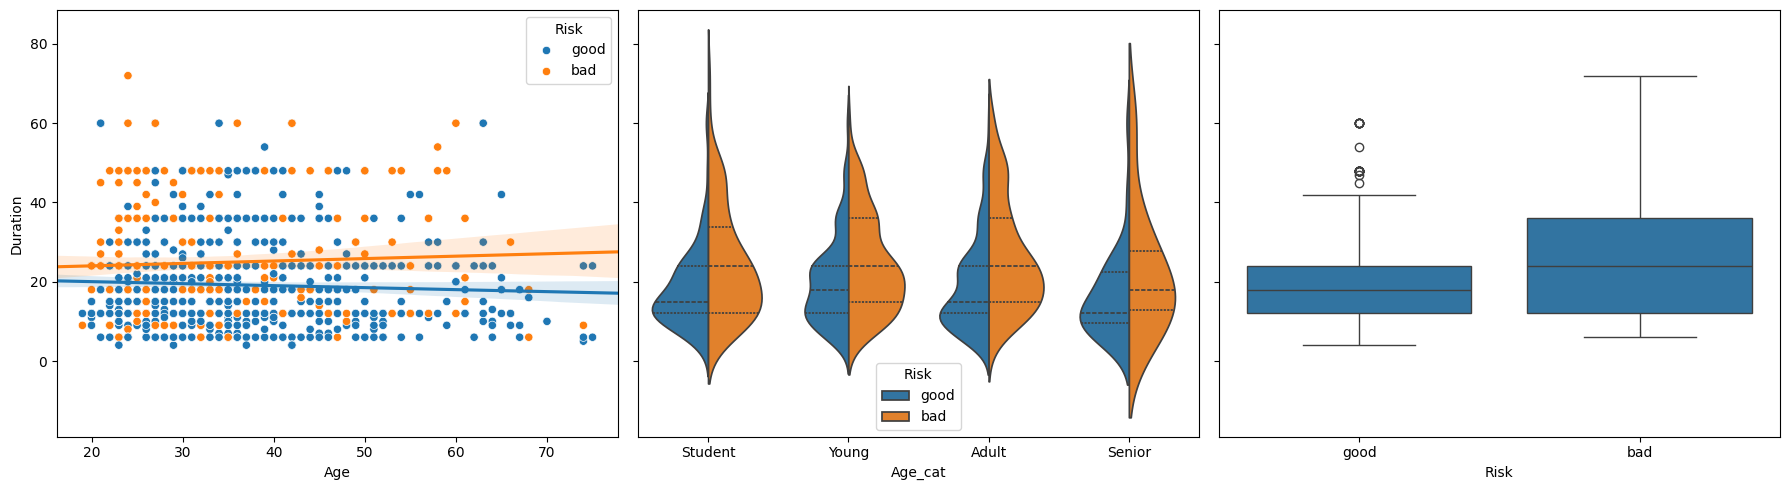

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.scatterplot(df, x='Age', y='Duration', hue='Risk', ax=axes[0])

for _,gr in df.groupby('Risk', sort=False):
    sns.regplot(x='Age', y='Duration', data=gr, scatter=False, ax=axes[0], truncate=False)
    
sns.violinplot(df, x='Age_cat', y='Duration', hue='Risk', split=True, inner="quart", ax=axes[1])
sns.boxplot(df, x='Risk', y='Duration', ax=axes[2])

plt.tight_layout()
plt.show()

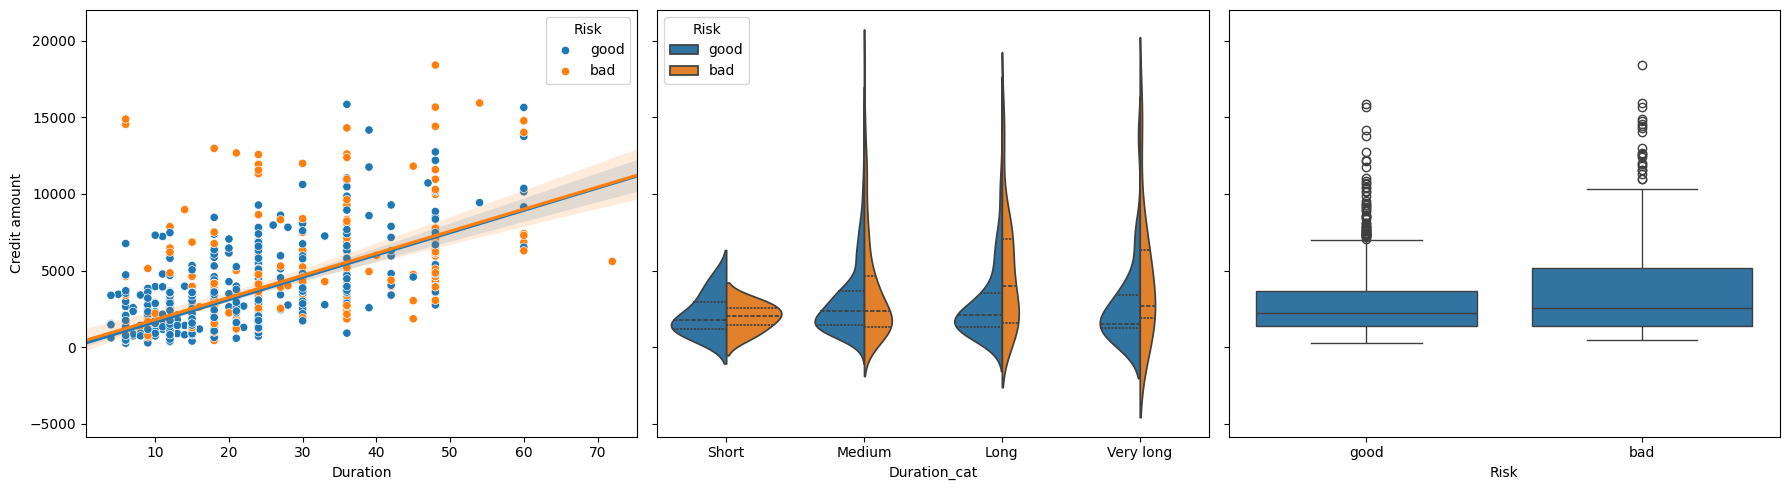

In [17]:
interval = (0, 20, 40, 60, 80)

cats = ['Short', 'Medium', 'Long', 'Very long']
df["Duration_cat"] = pd.cut(df.Age, interval, labels=cats)

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.scatterplot(df, x='Duration', y='Credit amount', hue='Risk', ax=axes[0])

for _,gr in df.groupby('Risk', sort=False):
    sns.regplot(x='Duration', y='Credit amount', data=gr, scatter=False, ax=axes[0], truncate=False)
    
sns.violinplot(df, x='Duration_cat', y='Credit amount', hue='Risk', split=True, inner="quart", ax=axes[1])
sns.boxplot(df, x='Risk', y='Credit amount', ax=axes[2])

plt.tight_layout()
plt.show()

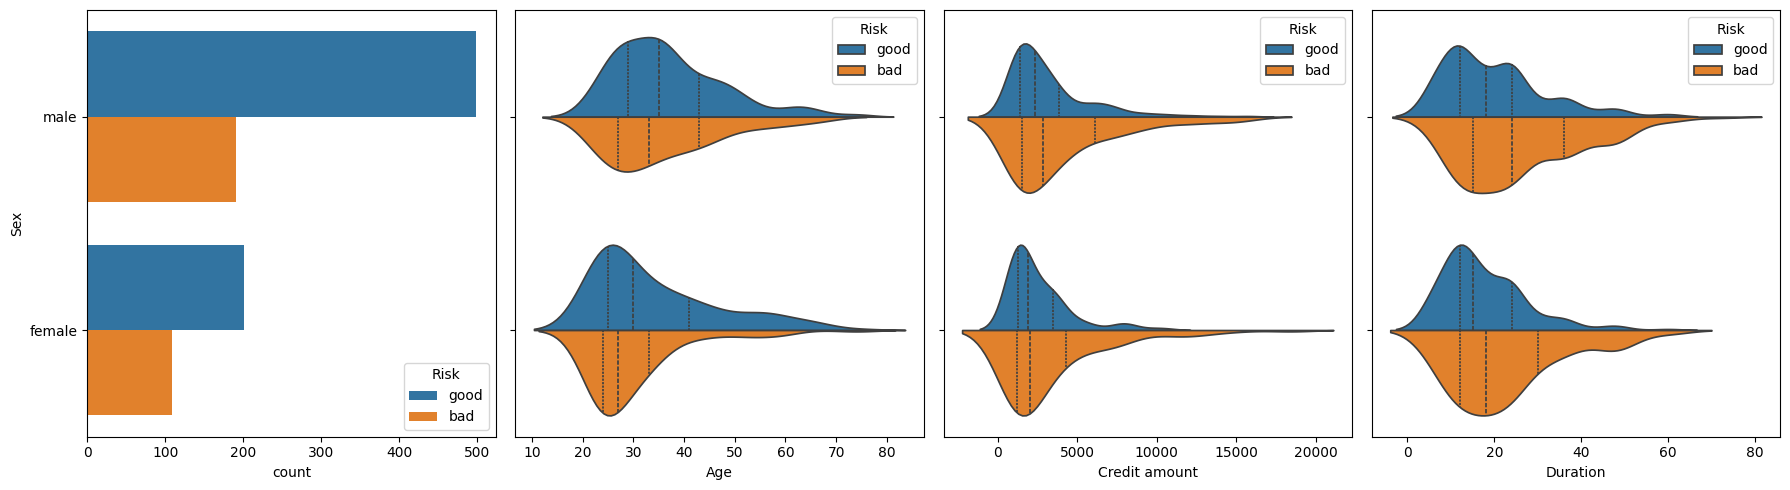

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

sns.countplot(df, y="Sex", hue="Risk", ax=axes[0])
sns.violinplot(df, x='Age', y="Sex", hue="Risk", split=True, inner="quart", ax=axes[1])
sns.violinplot(df, x='Credit amount', y="Sex", hue="Risk", split=True, inner="quart", ax=axes[2])
sns.violinplot(df, x='Duration', y="Sex", hue="Risk", split=True, inner="quart", ax=axes[3])

plt.tight_layout()
plt.show()

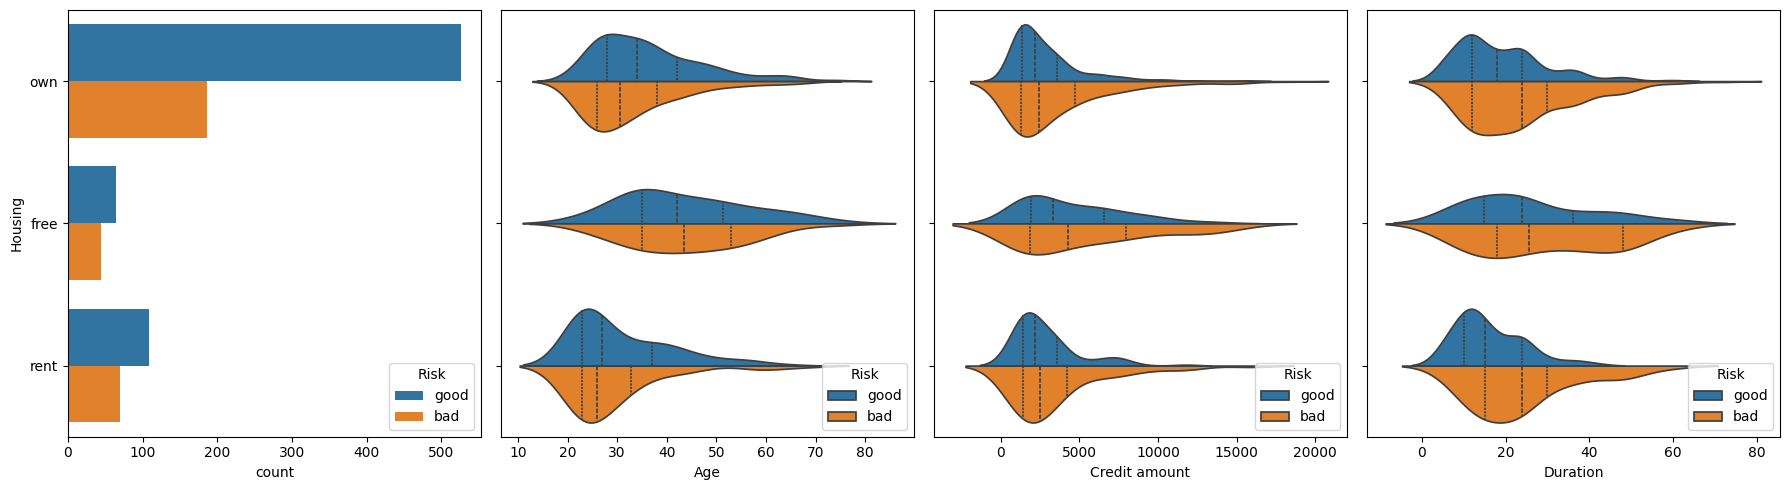

In [19]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

sns.countplot(df, y="Housing", hue="Risk", ax=axes[0])
sns.violinplot(df, x='Age', y="Housing", hue="Risk", split=True, inner="quart", ax=axes[1])
sns.violinplot(df, x='Credit amount', y="Housing", hue="Risk", split=True, inner="quart", ax=axes[2])
sns.violinplot(df, x='Duration', y="Housing", hue="Risk", split=True, inner="quart", ax=axes[3])

plt.tight_layout()
plt.show()

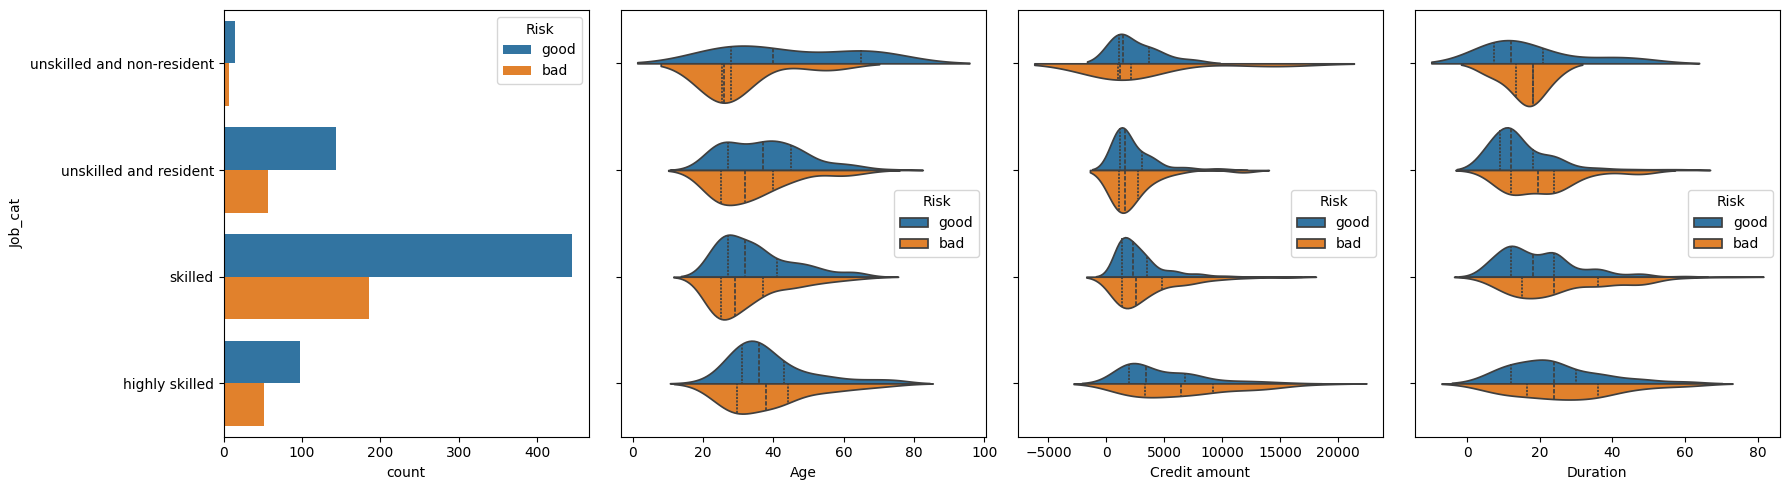

In [20]:
# A coluna Job fuciona como valor categórico
df['Job_cat'] = df['Job'].map({0 : 'unskilled and non-resident', 1 : 'unskilled and resident', 2 : 'skilled', 3 : 'highly skilled'})
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

sns.countplot(df, y="Job_cat", hue="Risk", ax=axes[0], order=['unskilled and non-resident', 'unskilled and resident', 'skilled', 'highly skilled'])
sns.violinplot(df, x='Age', y="Job_cat", hue="Risk", split=True, inner="quart", ax=axes[1])
sns.violinplot(df, x='Credit amount', y="Job_cat", hue="Risk", split=True, inner="quart", ax=axes[2])
sns.violinplot(df, x='Duration', y="Job_cat", hue="Risk", split=True, inner="quart", ax=axes[3])

plt.tight_layout()
plt.show()

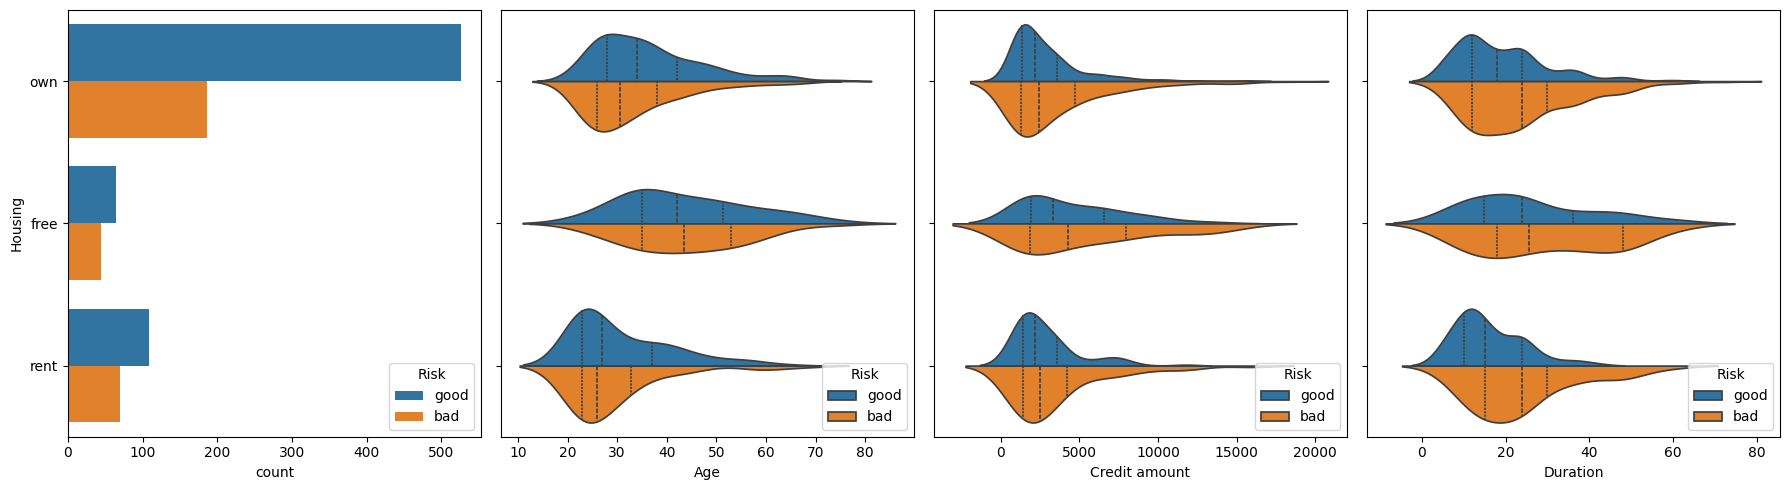

In [21]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

sns.countplot(df, y="Housing", hue="Risk", ax=axes[0])
sns.violinplot(df, x='Age', y="Housing", hue="Risk", split=True, inner="quart", ax=axes[1])
sns.violinplot(df, x='Credit amount', y="Housing", hue="Risk", split=True, inner="quart", ax=axes[2])
sns.violinplot(df, x='Duration', y="Housing", hue="Risk", split=True, inner="quart", ax=axes[3])

plt.tight_layout()
plt.show()

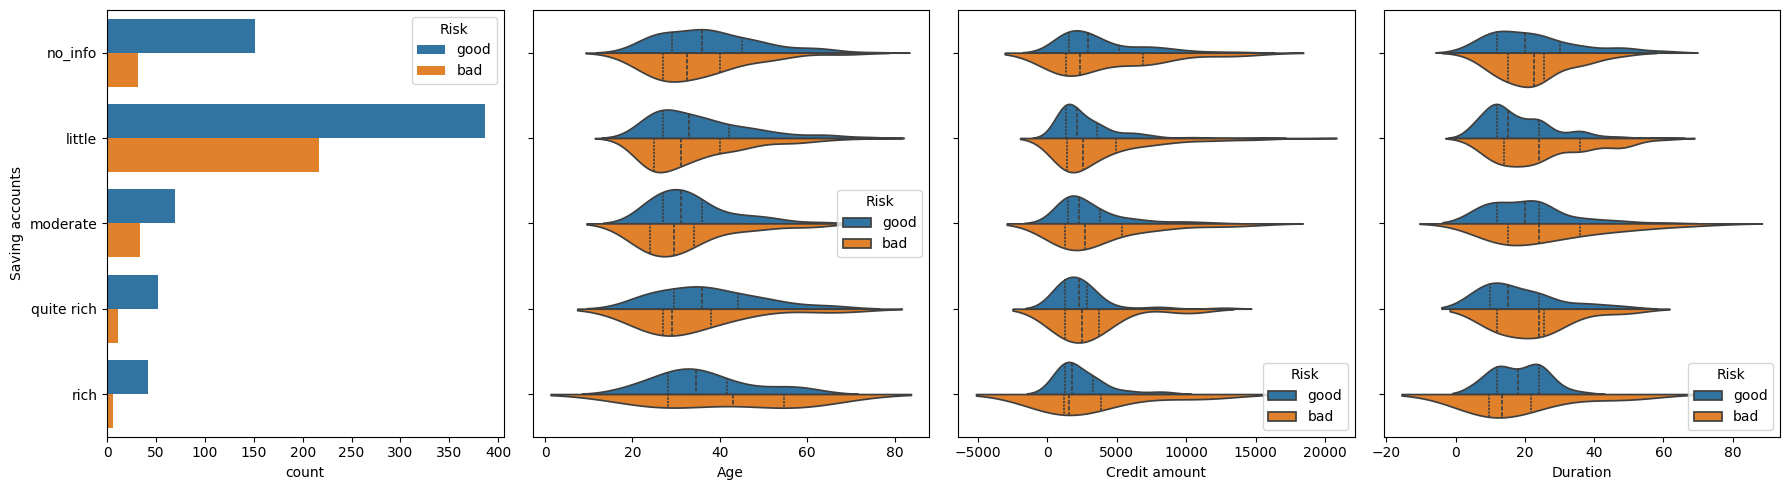

In [22]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

sns.countplot(df, y="Saving accounts", hue="Risk", ax=axes[0], order=['no_info', 'little', 'moderate', 'quite rich', 'rich'])
sns.violinplot(df, x='Age', y="Saving accounts", hue="Risk", split=True, inner="quart", ax=axes[1])
sns.violinplot(df, x='Credit amount', y="Saving accounts", hue="Risk", split=True, inner="quart", ax=axes[2])
sns.violinplot(df, x='Duration', y="Saving accounts", hue="Risk", split=True, inner="quart", ax=axes[3])

plt.tight_layout()
plt.show()

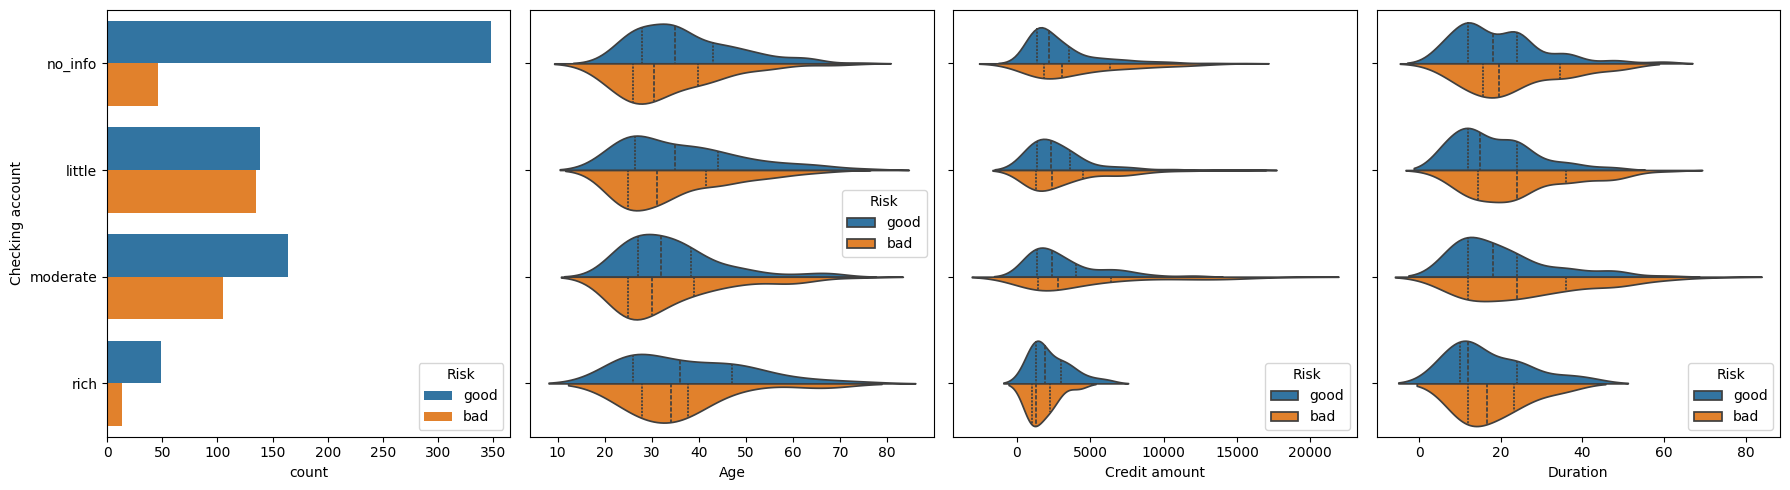

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

sns.countplot(df, y="Checking account", hue="Risk", ax=axes[0], order=['no_info', 'little', 'moderate', 'rich'])
sns.violinplot(df, x='Age', y="Checking account", hue="Risk", split=True, inner="quart", ax=axes[1])
sns.violinplot(df, x='Credit amount', y="Checking account", hue="Risk", split=True, inner="quart", ax=axes[2])
sns.violinplot(df, x='Duration', y="Checking account", hue="Risk", split=True, inner="quart", ax=axes[3])

plt.tight_layout()
plt.show()

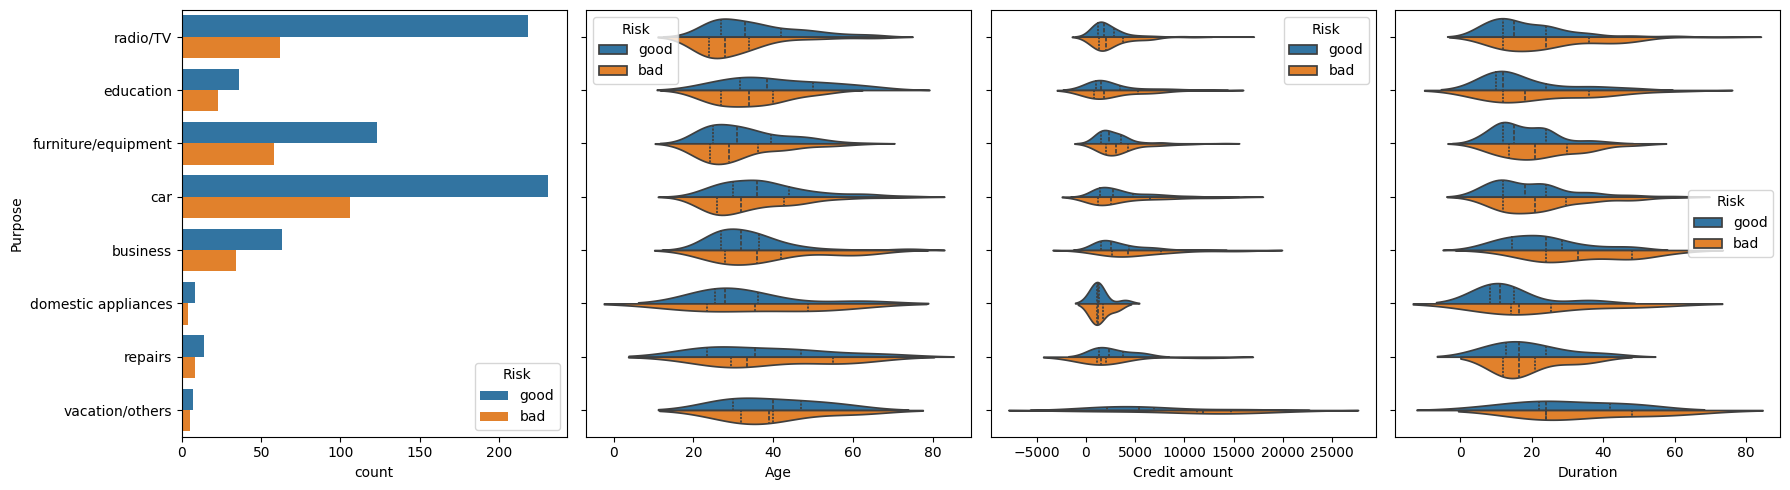

In [24]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

sns.countplot(df, y="Purpose", hue="Risk", ax=axes[0])
sns.violinplot(df, x='Age', y="Purpose", hue="Risk", split=True, inner="quart", ax=axes[1])
sns.violinplot(df, x='Credit amount', y="Purpose", hue="Risk", split=True, inner="quart", ax=axes[2])
sns.violinplot(df, x='Duration', y="Purpose", hue="Risk", split=True, inner="quart", ax=axes[3])

plt.tight_layout()
plt.show()

# Treinamento

In [25]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [26]:
df = df.merge(pd.get_dummies(df.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.Risk, prefix='Risk'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

del df["Saving accounts"]
del df["Checking account"]
del df["Purpose"]
del df["Sex"]
del df["Housing"]
del df["Age_cat"]
del df["Risk"]
del df['Risk_good']
del df['Job_cat']
del df['Duration_cat']

In [27]:
df['Credit amount'] = np.log(df['Credit amount'])

In [28]:
X = df.drop('Risk_bad', axis=1).values
y = df["Risk_bad"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

/home/daniel/anaconda3/envs/d3vis/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/daniel/anaconda3/envs/d3vis/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

LR: 0.399643 (0.083334)
LDA: 0.424515 (0.085843)
KNN: 0.282062 (0.079976)
CART: 0.474323 (0.051275)
NB: 0.610248 (0.074303)
RF: 0.367982 (0.075078)
SVM: 0.143989 (0.055608)
XGB: 0.473971 (0.058236)


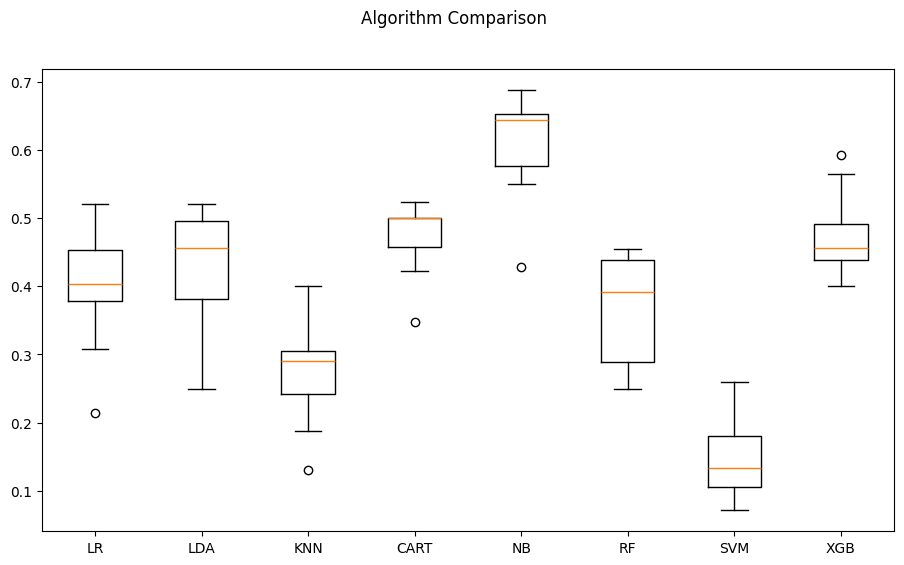

In [29]:
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()